In [19]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sentence_transformers import SentenceTransformer
from sentence_transformers import models
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics.cluster import v_measure_score

In [2]:
#データセットの管理
class NewsGroupDataset():
    def __init__(self):
        # jsonファイルのロード
        # load JSON 20newsgroup data
        with open("newsgroups.json") as fd:
            data = json.load(fd)
        # content, target(=class ID), target_name(=newsgroup name)
        content = data['content']
        target = data['target']
        target_names = data['target_names']
        # get dictionary values for content, target, and target_names
        content_value = content.values()
        target_value = target.values()
        target_name_value = target_names.values()
        # extract lists for content, target, and target_names
        self.content_value_list = list(content_value) # メッセージテキスト本体
        self.target_value_list = list(target_value) # メッセージのカテゴリ ID
        self.target_namevalue_list = list(target_name_value)
        num_docs = 11314 # (=len(content.keys()) 

In [39]:
#SentenceTransformerでの埋め込みデータを保持
class SentenceTransformerModel:
    def __init__(self, model_num):
        if model_num ==1:
            name = "sentence-transformers/all-MiniLM-L6-v2"
        elif model_num==2:
            name ="sentence-transformers/paraphrase-multilingual-mpnet-base-v2"
        else:
            name = "sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2"
        transformer = models.Transformer(name)
        pooling = models.Pooling(transformer.get_word_embedding_dimension(),pooling_mode_mean_tokens=True, pooling_mode_cls_token=False, pooling_mode_max_tokens=False)
        self.model = SentenceTransformer(modules=[transformer, pooling])

    def gen_embeddings(self,sentences,label):
        embeddings=self.model.encode(sentences)
        self.df=pd.DataFrame(embeddings)
        self.label=pd.Series(data=label)


In [34]:
class ClusteringModel:
    def __init__(self) -> None:
        pass

    def plot(self,df,labels):
        X=StandardScaler().fit_transform(df)
        pca=PCA(n_components=2).fit(X)
        X_pc=pca.transform(X)
        df_pc=pd.DataFrame(X_pc)
        plt.figure(figsize=(14,10))
        plt.scatter(df_pc.iloc[:,0],df_pc.iloc[:,1],c=labels,s=50)
        plt.show()

    def calc_purity(self,df,true_label,pred_label):
        #Cross Tableを作成
        crosstab=pd.crosstab(true_label,pred_label)
        #Cross Tableを用いてpurity値を計算
        tmp=.0
        for i in range(len(crosstab.index.values)):
            tmp+=max(crosstab[:][i])
        purity=tmp/len(df.values)
        print("purity: ",purity)
    
    def calc_v_measure(self,true_label,pred_label):
        print("V-measure: ",v_measure_score(true_label,pred_label))

class KMeansModel(ClusteringModel):
    def __init__(self,cluster_num,df):
        #クラスタ数20でk-meansクラスタリングを実行
        self.df=df
        self.model=KMeans(n_clusters=20)
        self.model.fit(self.df.values)

    def plot(self):
        super().plot(self.df,self.model.labels_)
    
    def calc_purity(self,true_label):
        super().calc_purity(self.df,true_label,self.model.labels_)
    
    def calc_v_measure(self,true_label):
        super().calc_v_measure(true_label,self.model.labels_)

class GaussianMixtureModel(ClusteringModel):
    def __init__(self,cluster_num,df):
        #クラスタ数20でk-meansクラスタリングを実行
        self.df=df
        self.model=GaussianMixture(n_components=cluster_num)
        self.model.fit(self.df.values)
        self.pred_label=self.model.predict(self.df.values)

    def plot(self):
        super().plot(self.df,self.pred_label)
    
    def calc_purity(self,true_label):
        super().calc_purity(self.df,true_label,self.pred_label)
    
    def calc_v_measure(self,true_label):
        super().calc_v_measure(true_label,self.pred_label)
    

In [40]:
dataset=NewsGroupDataset()

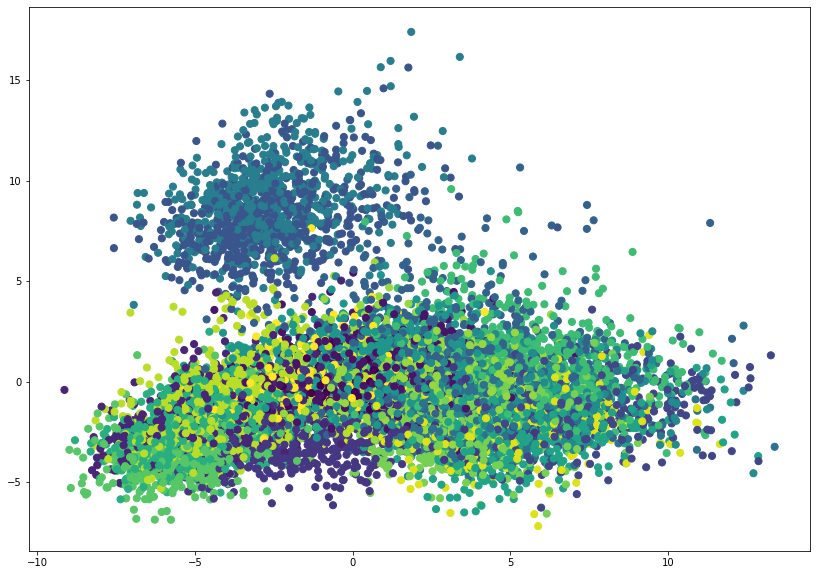

purity:  0.6173767014318543
V-measure:  0.6083863717213981


In [23]:
transformer1=SentenceTransformerModel(1)
transformer1.gen_embeddings(dataset.content_value_list,dataset.target_value_list)
kmeans1=KMeansModel(20,transformer1.df)
kmeans1.plot()
kmeans1.calc_purity(transformer1.label)
kmeans1.calc_v_measure(transformer1.label)

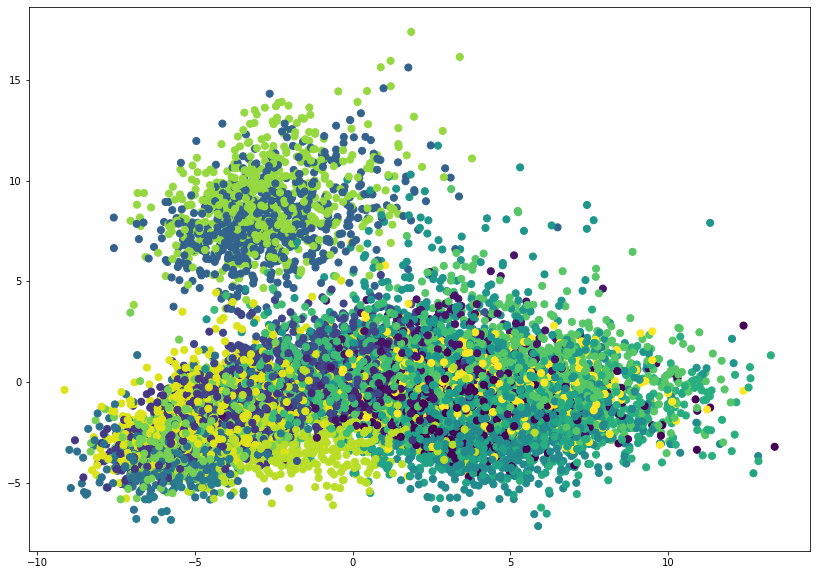

purity:  0.6099522715220081
V-measure:  0.6047431955651683


In [31]:
kmeans1=GaussianMixtureModel(20,transformer1.df)
kmeans1.plot()
kmeans1.calc_purity(transformer1.label)
kmeans1.calc_v_measure(transformer1.label)

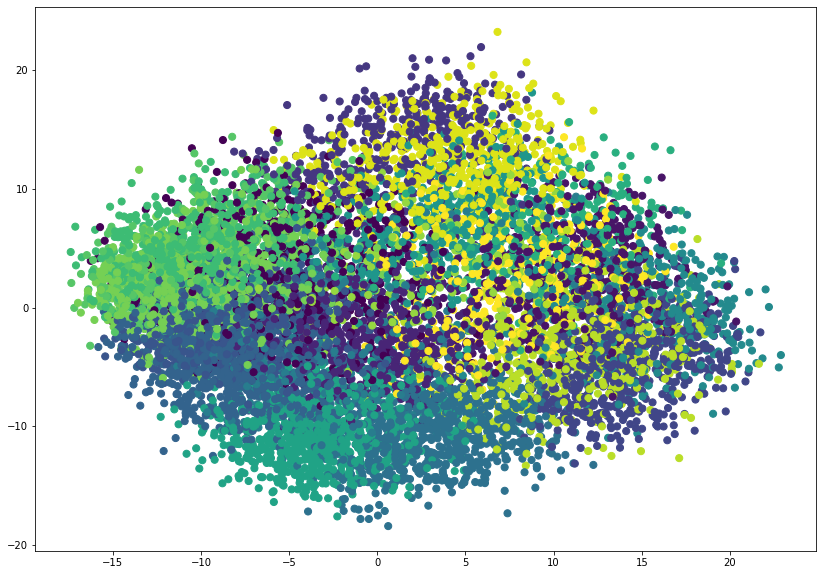

purity:  0.4284956690825526
V-measure:  0.46401469639735127


In [35]:
transformer2=SentenceTransformerModel(2)
transformer2.gen_embeddings(dataset.content_value_list,dataset.target_value_list)
kmeans2=KMeansModel(20,transformer2.df)
kmeans2.plot()
kmeans2.calc_purity(transformer2.label)
kmeans2.calc_v_measure(transformer2.label)

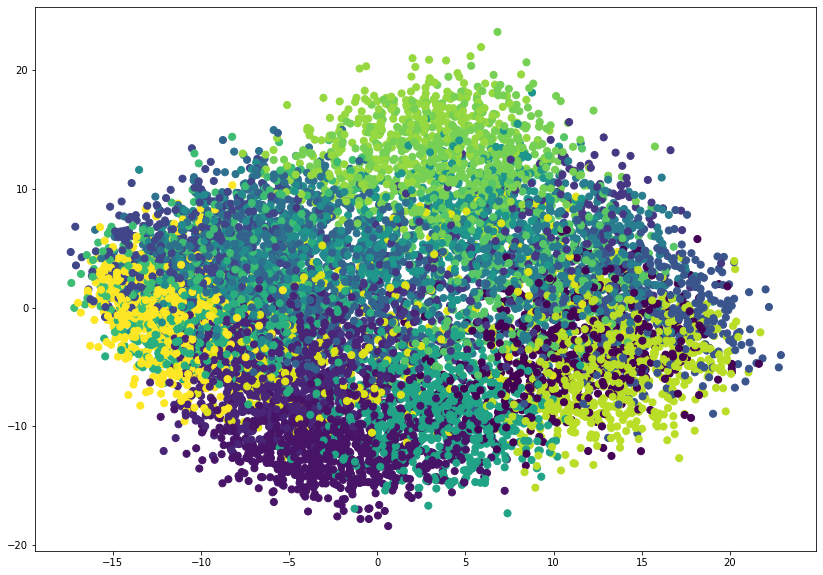

purity:  0.4066643097047905
V-measure:  0.442809303161699


In [36]:
kmeans2=GaussianMixtureModel(20,transformer2.df)
kmeans2.plot()
kmeans2.calc_purity(transformer2.label)
kmeans2.calc_v_measure(transformer2.label)

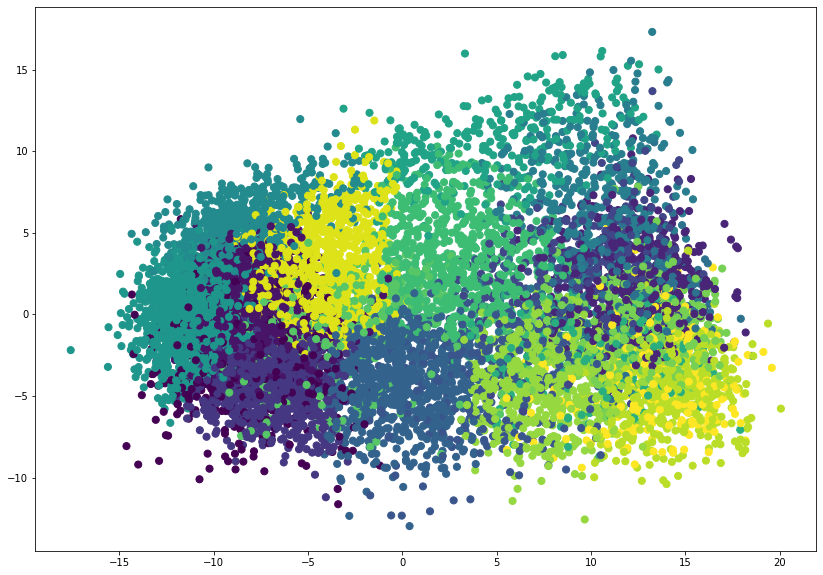

purity:  0.24094042778858052
V-measure:  0.27330196077501645


In [37]:
transformer3=SentenceTransformerModel(3)
transformer3.gen_embeddings(dataset.content_value_list,dataset.target_value_list)
kmeans3=KMeansModel(20,transformer3.df)
kmeans3.plot()
kmeans3.calc_purity(transformer3.label)
kmeans3.calc_v_measure(transformer3.label)

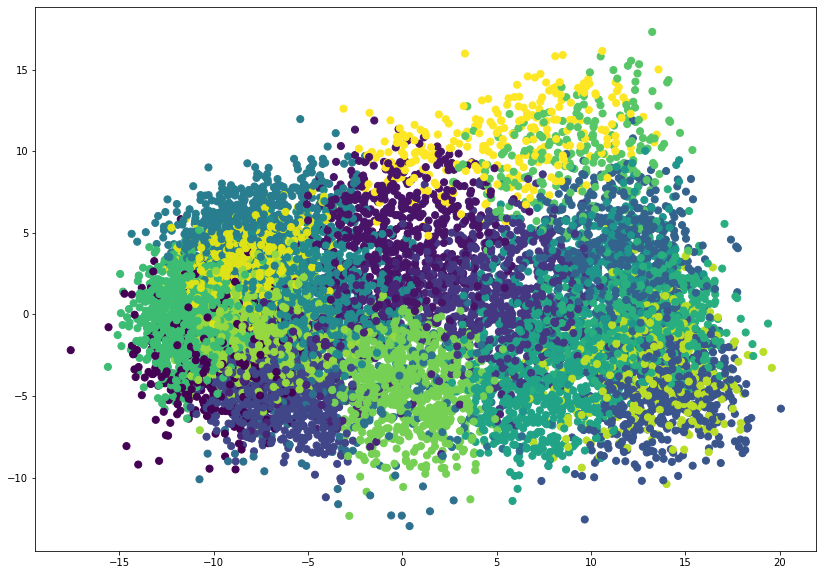

purity:  0.2585292557892876
V-measure:  0.27905559446026434


In [38]:
kmeans3=GaussianMixtureModel(20,transformer3.df)
kmeans3.plot()
kmeans3.calc_purity(transformer3.label)
kmeans3.calc_v_measure(transformer3.label)